In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd

In [27]:
# vg_noun_data=pickle.load(open("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_10_10_100.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_10_10_100.pkl","rb"))

In [28]:
# vg_noun_data=pickle.load(open("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_10_10_10.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_10_10_10.pkl","rb"))

In [29]:
# vg_noun_data=pickle.load(open("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_subsample_10_10_10.pkl","rb"))
# vg_verb_data=pickle.load(open("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_subsample_10_10_10.pkl","rb"))

In [30]:
vg_noun_data=pickle.load(open("../data/dumped_plot_data_replication/2D_vg_noun_bert_visual_language_subsample_8_8_500.pkl","rb"))
vg_verb_data=pickle.load(open("../data/dumped_plot_data_replication/2D_vg_verb_bert_visual_language_subsample_8_8_500.pkl","rb"))

In [31]:
vg_noun_data["y_mat"].shape

(8, 8, 500)

In [6]:
# vg_noun_data_ymat=np.mean(vg_noun_data["y_mat"],axis=-1)[:8,:8]
# vg_verb_data_ymat=np.mean(vg_verb_data["y_mat"],axis=-1)[:8,:8]

In [32]:
vg_noun_data_ymat=np.mean(vg_noun_data["y_mat"],axis=-1)[:8,:8]
vg_verb_data_ymat=np.mean(vg_verb_data["y_mat"],axis=-1)[:8,:8]

In [33]:
vg_noun_data_ymat.shape

(8, 8)

In [34]:
# vg_noun_data_ymat=vg_noun_data["y_mat"][:,:,-1]

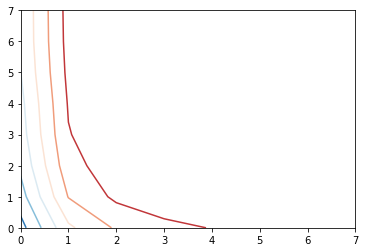

In [35]:
plt.contour(range(vg_noun_data_ymat.shape[0]),range(vg_noun_data_ymat.shape[1]),vg_noun_data_ymat, cmap='RdBu_r')

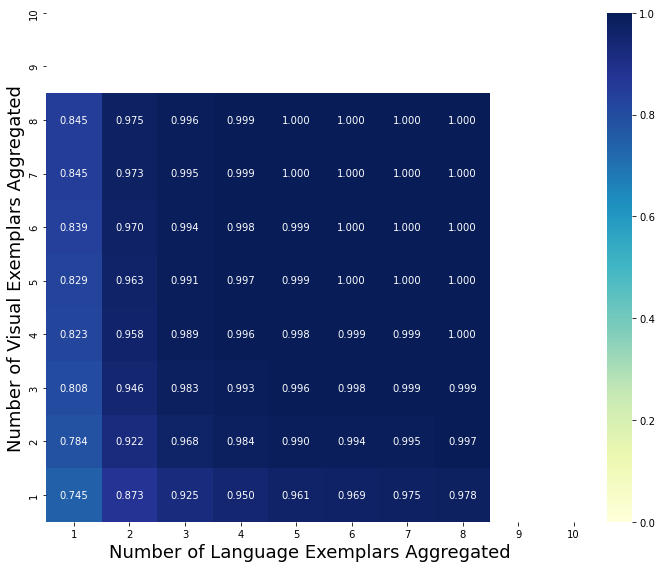

In [36]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(vg_noun_data_ymat,vmin=0,vmax=1,annot=True,fmt=".3f",cmap="YlGnBu",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_noun_bert_heatmap.png")
plt.show()

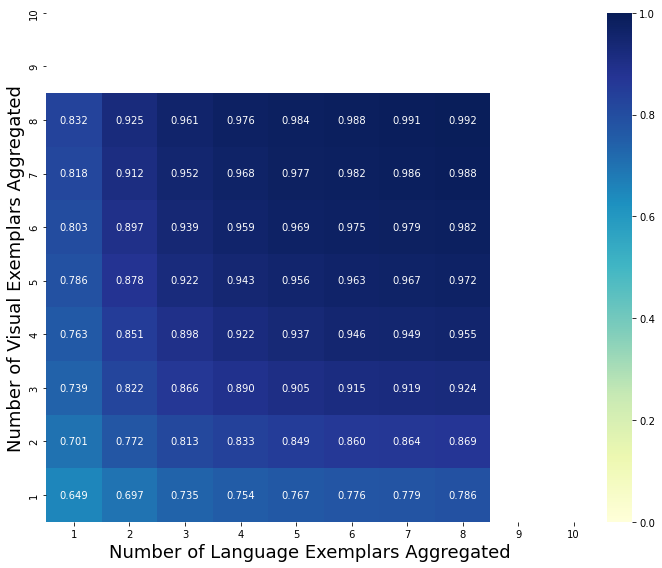

In [37]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(vg_verb_data_ymat,vmin=0,vmax=1,annot=True,fmt=".3f",cmap="YlGnBu",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_verb_bert_heatmap.png")
plt.show()

In [38]:
def draw_vector_2D(ax, x, y, lenx, leny, arrow_width, positive):
#     grad = np.array([-np.sin(x),np.cos(y)])
    if positive:
        ax.quiver(x,y,lenx, leny, angles='xy', scale_units='xy', scale=1, width=arrow_width, color='blue')
    else:
        ax.quiver(x,y,lenx, leny, angles='xy', scale_units='xy', scale=1, width=arrow_width, color='orange')

In [39]:
def draw_point(ax, x, y, size, positive):
    if positive:
        ax.scatter(x, y, s=size, color='blue')
    else:
        ax.scatter(x, y, s=size, color='orange')

In [138]:
def draw_arrow(ax, x, y, dx, dy):
    ax.quiver(x,y,dx,dy,angles='xy',width=0.005+dx**2+dy**2)

Text(0, 0.5, 'Number of Visual Exemplars Aggregated')

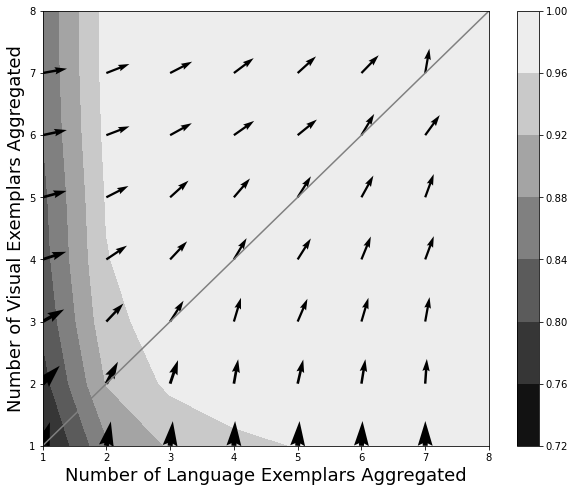

In [147]:
plt.figure(figsize=(10, 8))
plt.contourf(range(vg_noun_data_ymat.shape[0]),range(vg_noun_data_ymat.shape[1]),vg_noun_data_ymat, cmap='gray')
plt.colorbar()
plt.axline((0, 0), slope=1, color='grey')
for i in range(vg_noun_data_ymat.shape[0]-1):
    for j in range(vg_noun_data_ymat.shape[1]-1):
        d_x=vg_noun_data_ymat[i+1][j]-vg_noun_data_ymat[i][j]
        d_y=vg_noun_data_ymat[i][j+1]-vg_noun_data_ymat[i][j]
        #draw_point(plt,i,j,abs(d_y-d_x)*10000,abs(d_y-d_x)==d_y-d_x)
        draw_arrow(plt,i,j,d_x,d_y)
        # draw_vector_2D(plt,i,j,1,0,abs(d_y)*0.1, abs(d_y)==d_y)
        # draw_vector_2D(plt,i,j,0,1,abs(d_x)*0.1, abs(d_x)==d_x)
plt.xticks(range(0,8),range(1,9))
plt.yticks(range(0,8),range(1,9))
plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)

Text(0, 0.5, 'Number of Visual Exemplars Aggregated')

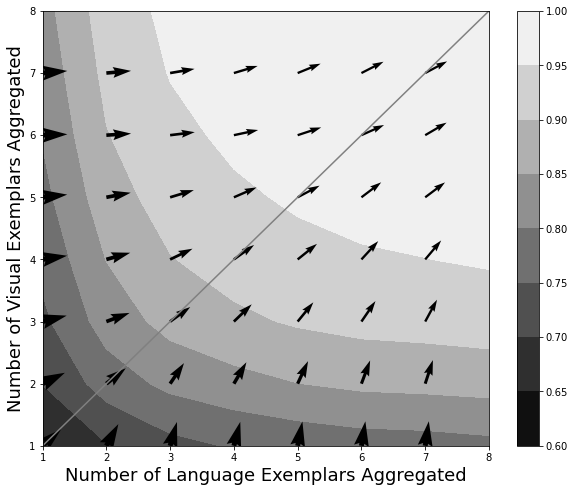

In [148]:
plt.figure(figsize=(10, 8))
plt.contourf(range(vg_verb_data_ymat.shape[0]),range(vg_verb_data_ymat.shape[1]),vg_verb_data_ymat, cmap='gray')
plt.colorbar()
plt.axline((0, 0), slope=1, color='grey')
for i in range(vg_verb_data_ymat.shape[0]-1):
    for j in range(vg_verb_data_ymat.shape[1]-1):
        d_x=vg_verb_data_ymat[i+1][j]-vg_verb_data_ymat[i][j]
        d_y=vg_verb_data_ymat[i][j+1]-vg_verb_data_ymat[i][j]
        # draw_point(plt,i,j,abs(d_y-d_x)*10000,abs(d_y-d_x)==d_y-d_x)
        draw_arrow(plt,i,j,d_x,d_y)
        #plt.scatter(i,j,s=abs(d_y-d_x)*10000, color='b')
        # draw_vector_2D(plt,i,j,1,0,abs(d_y)*0.1, abs(d_y)==d_y)
        # draw_vector_2D(plt,i,j,0,1,abs(d_x)*0.1, abs(d_x)==d_x)

plt.xticks(range(0,8),range(1,9))
plt.yticks(range(0,8),range(1,9))
plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)

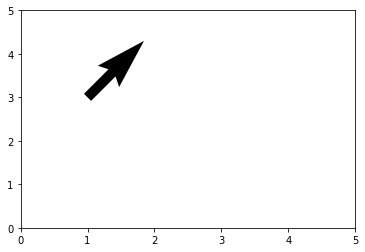

In [128]:
plt.quiver(1,3,1,1,angles='uv',scale=1,scale_units='xy',width=0.03)
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

In [55]:
def compute_gradient_diff(ymat):
    diff=np.zeros((len(ymat)-1,len(ymat[0])-1))
    for i in range(len(ymat)-1):
        for j in range(len(ymat[0])-1):
            f_diff_x=ymat[i+1][j]-ymat[i][j]
            f_diff_y=ymat[i][j+1]-ymat[i][j]
            diff_x_minus_y=f_diff_x-f_diff_y
            # print(diff_x_minus_y)
            diff[i][j]=diff_x_minus_y
    return diff

In [56]:
diff_noun=compute_gradient_diff(vg_noun_data_ymat)
diff_verb=compute_gradient_diff(vg_verb_data_ymat)

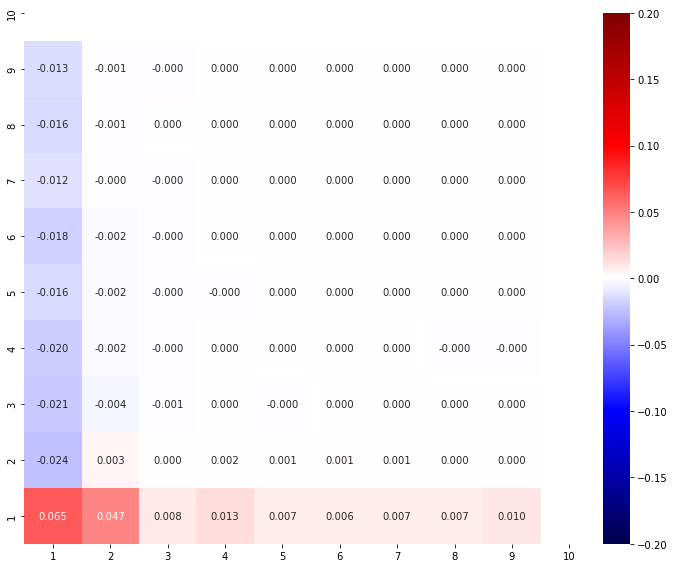

In [59]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(diff_noun,vmin=-0.2,vmax=0.2,annot=True,fmt=".3f",cmap="seismic",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
# plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
# plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_noun_bert_heatmap_diff.png")
plt.show()

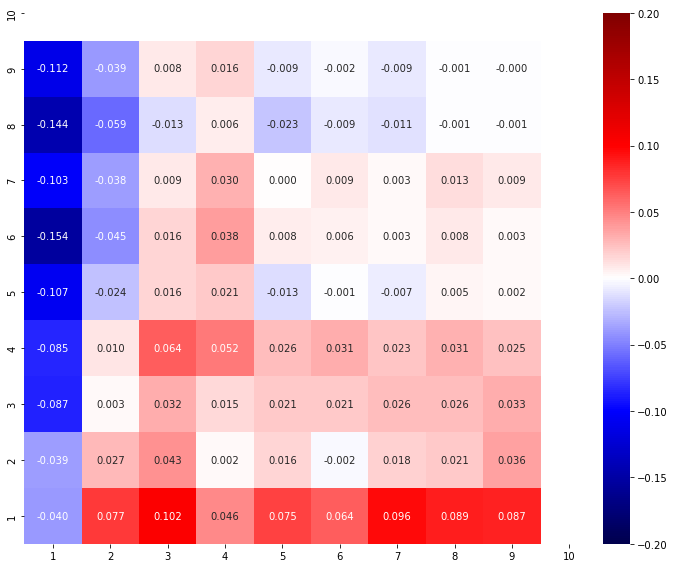

In [60]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(diff_verb,vmin=-0.2,vmax=0.2,annot=True,fmt=".3f",cmap="seismic",xticklabels=range(1,11),yticklabels=range(1,11))
ax.invert_yaxis()
# plt.xlabel("Number of Language Exemplars Aggregated",fontsize=18)
# plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=18)
plt.tight_layout()
plt.savefig("../figs/vg_verb_bert_heatmap_diff.png")
plt.show()